In [68]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from lsmc import *
from visualizingData import *
import pandas as pd
import os
import ast

from decimal import Decimal

In [69]:
# Load the data from the specified .npz file
file = np.load("..\\data_manip\\provided_data\\FTICR.npz", allow_pickle=True)

# # Extract the necessary components from the file
print(file.files)

selected_B = file['selected_B'][()]
shape = file['shape'][()]
mz_values = file['mz'][()]

ground_truth = selected_B


['selected_B', 'shape', 'mz']


In [70]:
loaded_matrix = np.load('..\\methods\\FTICR_SAMPLED_DATA\\FTICR_4_uni20_cli50.npy', allow_pickle=True).item()
mask_ = np.load('..\\methods\\FTICR_SAMPLED_DATA\\MASK4_uni20_cli50.npy', allow_pickle=True).item()
dense_matrix = loaded_matrix.toarray()
mask = mask_.toarray()

In [71]:
def dimensionChange(M,k):
    return M[:k,:k] 

def dataNMaskChange(M_dense_matrix, mask, k):
    M_dense_matrix = dimensionChange(M_dense_matrix,k)
    mask= dimensionChange(mask,k)
    return M_dense_matrix, mask


In [72]:
DENSE, MASK = dataNMaskChange(M_dense_matrix=dense_matrix, mask=mask, k=2000)

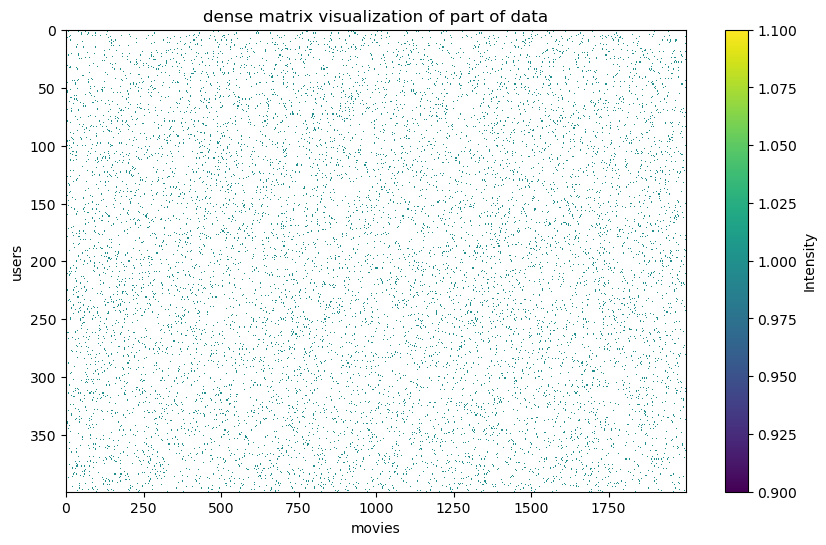

In [73]:
visualizeData(np.where(MASK==0,np.nan,1))

In [88]:
# Matrix dimensions
m, n = DENSE.shape

# Initializing matrices and variables
R = DENSE  # Original dense matrix
P_init = np.random.rand(m, n)  # Initial guess for matrix P
u_init = np.zeros((m, n))  # Initial values for u
y_init = np.zeros((m, n))  # Initial values for y
s_init = 1  # Initial value for s

# Define ranges for hyperparametersgamma = .001
delta = 1e-7  # Tolerance level for optimization
num_iterations = 1000  # Number of iterations for optimization
r_stop = 201
gamma=.001

# Generate rhos for each lambda
rho= .0000005

lamda=rho*.1  # Regularization parameter λ values

# LAMDA ALS FUNCTIE VAN RHO EN CURVEFITTEN VOOR WELKE WAARDE VAN X IK RHO*X= LAMDA MOET UITVOEREN

In [89]:
# Calculate epsilon based on matrix size and gamma
epsilon = m * n * gamma  # Error threshold as defined in the paper

# Print current parameter settings


# Run the optimization function with the current parameters
P_final, Z_final, u_final, y_final, s_final, errors, r_errors, rank = LMSC_optimize_rank_stop(
    rho, lamda, R, P_init, MASK, u_init, y_init, s_init, delta, epsilon, num_iterations, r_stop
)

Is lambda smaller then rho?: True
0: rank=0
1: rank=0
2: rank=0
3: rank=0
4: rank=0
5: rank=0
6: rank=0
7: rank=0
8: rank=0
9: rank=0
10: rank=1
11: rank=1
12: rank=1
13: rank=1
14: rank=1
15: rank=1
16: rank=1
17: rank=1
18: rank=1
19: rank=1
20: rank=1
21: rank=1
22: rank=1
23: rank=1
24: rank=1
25: rank=1
26: rank=1
27: rank=1
28: rank=1
29: rank=1
30: rank=1
31: rank=1
32: rank=1
33: rank=1
34: rank=1
35: rank=1
36: rank=1
37: rank=1
38: rank=1
39: rank=1
40: rank=1
41: rank=1
42: rank=1
43: rank=1
44: rank=1
45: rank=1
46: rank=1
47: rank=1
48: rank=1
49: rank=1
50: rank=1
51: rank=1
52: rank=1
53: rank=1
54: rank=1
55: rank=2
56: rank=5
57: rank=9
58: rank=12
59: rank=19
60: rank=23
61: rank=27
62: rank=32
63: rank=36
64: rank=41
65: rank=46
66: rank=52
67: rank=57
68: rank=62
69: rank=66
70: rank=72
71: rank=77
72: rank=80
73: rank=83
74: rank=88
75: rank=92
76: rank=97
77: rank=100
78: rank=104
79: rank=108
80: rank=110
81: rank=113
82: rank=117
83: rank=121
84: rank=123
85: ra

In [90]:
lamda/rho

0.1

In [83]:
rank

229

In [84]:
errors

[]

In [85]:
# relErrorPlot(errors=r_errors)
errorPlot(errors=errors)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 640x480 with 0 Axes>

In [86]:
relErrorPlot(r_errors)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 640x480 with 0 Axes>

In [87]:
allErrors(ground_truth[:2000,:2000], Z_final, MASK)

(5.361002196020888, 44.638999574057486, 50.0000017700784)

In [ ]:
csc_matrix(Z_final).nnz/np.prod(Z_final.shape)

0.99995

In [ ]:

def SVD_truncated(A, k):
    """
    Apply the thresholding operator to the singular values of X
    """
    U, S, V = np.linalg.svd(A, full_matrices=False)
    n= len(S)
    
    if k > n:
        k = n
    
    S= S[:k]
    U = U[:, :k]
    V = V[:k, :]
    return (U* S) @ V


In [67]:
100* np.linalg.norm(SVD_truncated(dense_matrix,20)-dense_matrix, 'fro')/np.linalg.norm(dense_matrix, 'fro')


35.45712492799889

In [64]:
100*np.linalg.norm((P_final-dense_matrix),'fro')/np.linalg.norm(dense_matrix,'fro')

49.73344319407853

In [65]:
100*np.linalg.norm((Z_final-dense_matrix),'fro')/np.linalg.norm(dense_matrix,'fro')

49.86943779810618